# Getting Started with Rayshader

Rayshader Code pulled from https://www.rayshader.com/

-----

Generating a very basic 2D image as a starting point:

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select



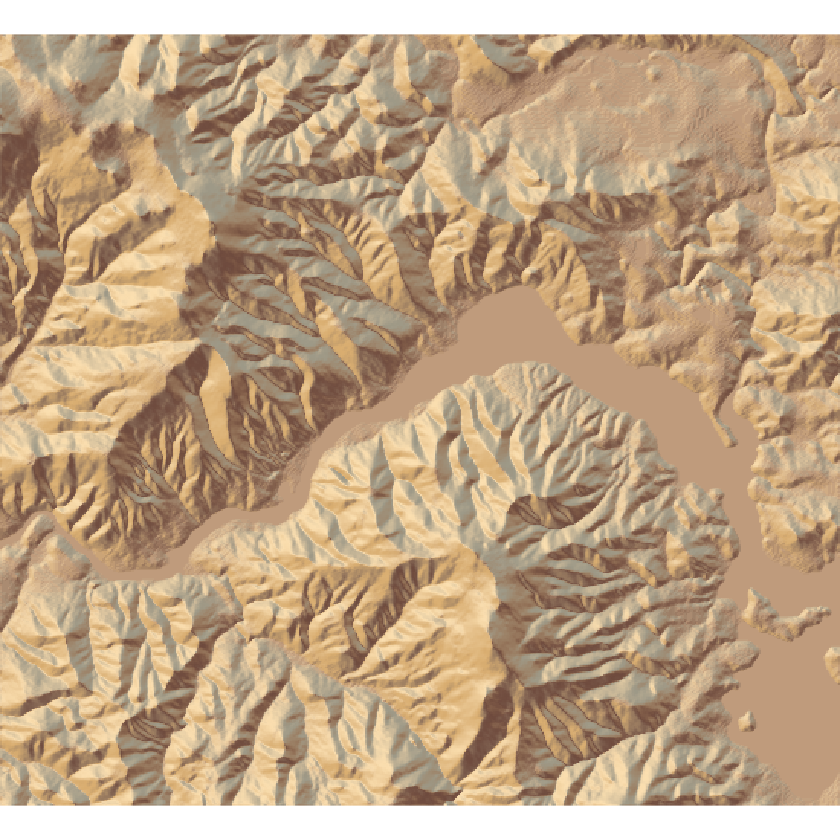

In [1]:
library(rayshader)
library(dplyr)
library(raster)

#Here, Tyler Morgan-Wall coded loading a map with the raster package.
loadzip = tempfile() 
download.file("https://tylermw.com/data/dem_01.tif.zip", loadzip)
localtif = raster::raster(unzip(loadzip, "dem_01.tif"))
unlink(loadzip)

#And convert it to a matrix:
elmat = matrix(raster::extract(localtif,raster::extent(localtif),buffer=1000),
               nrow=ncol(localtif),ncol=nrow(localtif))

#We use another one of rayshader's built-in textures:
elmat %>%
  sphere_shade(texture = "desert") %>%
  plot_map()

The sun direction can be controlled.

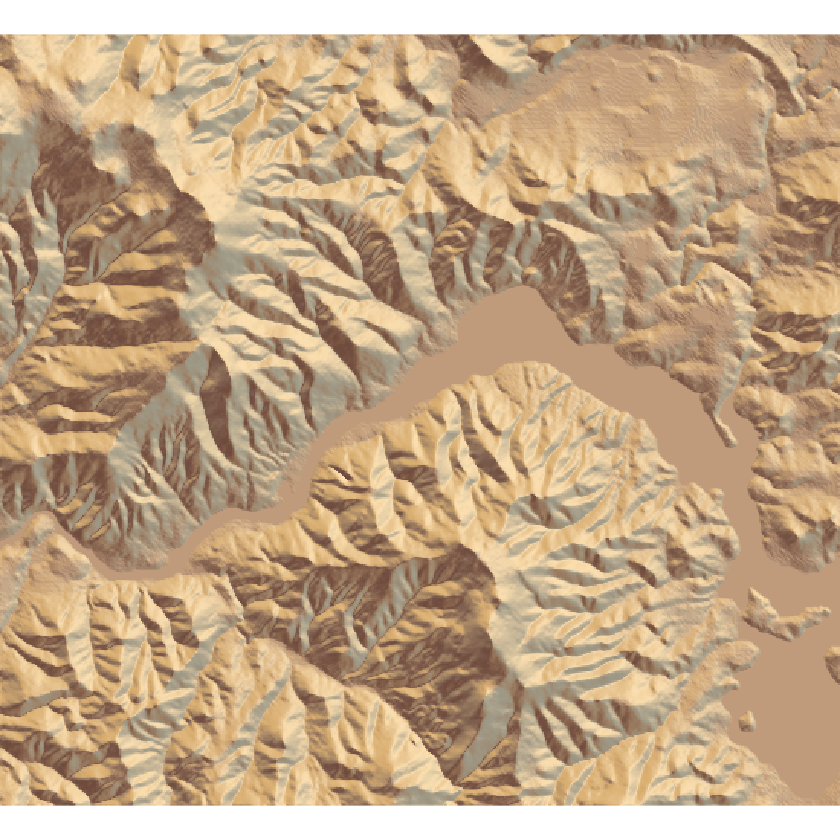

In [2]:
#sphere_shade can shift the sun direction:
elmat %>%
  sphere_shade(sunangle = 45, texture = "desert") %>%
  plot_map()

## Improving the image in a series of steps

Add water.

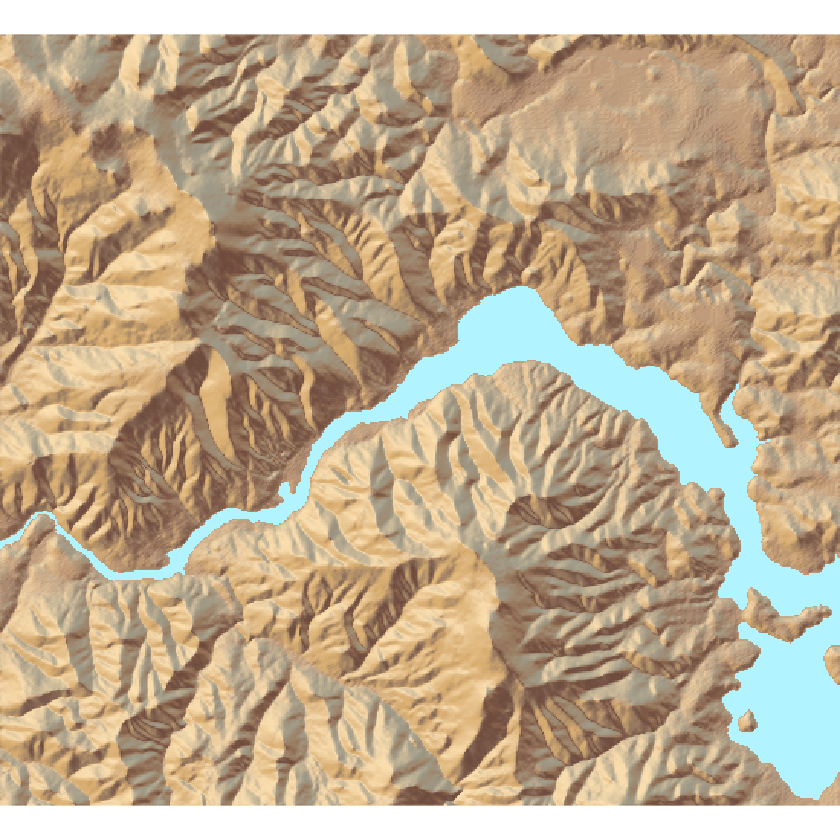

In [3]:
#detect_water and add_water adds a water layer to the map:
elmat %>%
  sphere_shade(texture = "desert") %>%
  add_water(detect_water(elmat), color="desert") %>%
  plot_map()

Add a layer from the sun direction

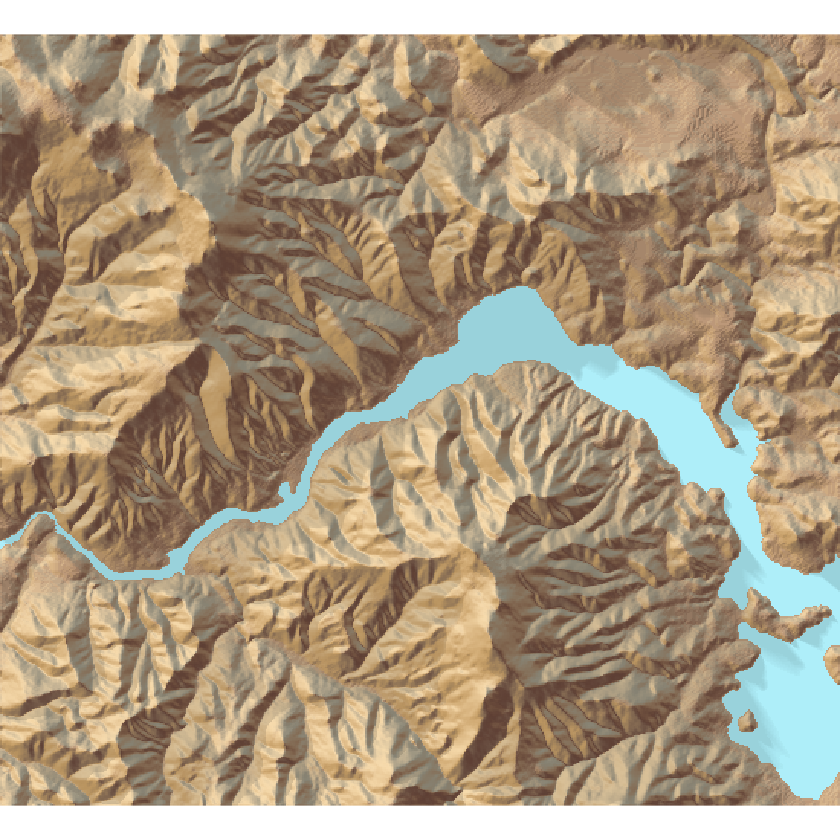

In [4]:
raymat = ray_shade(elmat)

#And we can add a raytraced layer from that sun direction as well:
elmat %>%
  sphere_shade(texture = "desert") %>%
  add_water(detect_water(elmat), color="desert") %>%
  add_shadow(raymat) %>%
  plot_map()

Add modeling of lighting from atmospheric scattering.

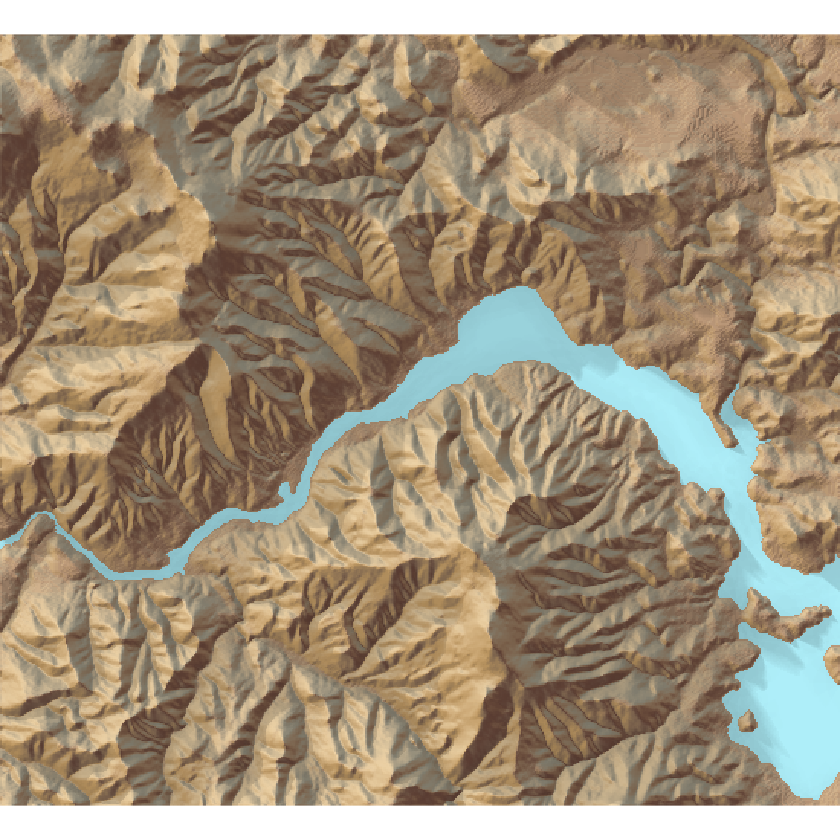

In [5]:
#And here we add an ambient occlusion shadow layer, which models 
#lighting from atmospheric scattering:

ambmat = ambient_shade(elmat)

elmat %>%
  sphere_shade(texture = "desert") %>%
  add_water(detect_water(elmat), color="desert") %>%
  add_shadow(raymat) %>%
  add_shadow(ambmat) %>%
  plot_map()



## 3D mapping

This doesn't work here yet because rendering requires video settings not set up for 'headless' use. In other words, this doesn't generate correctly from the remote server yet.

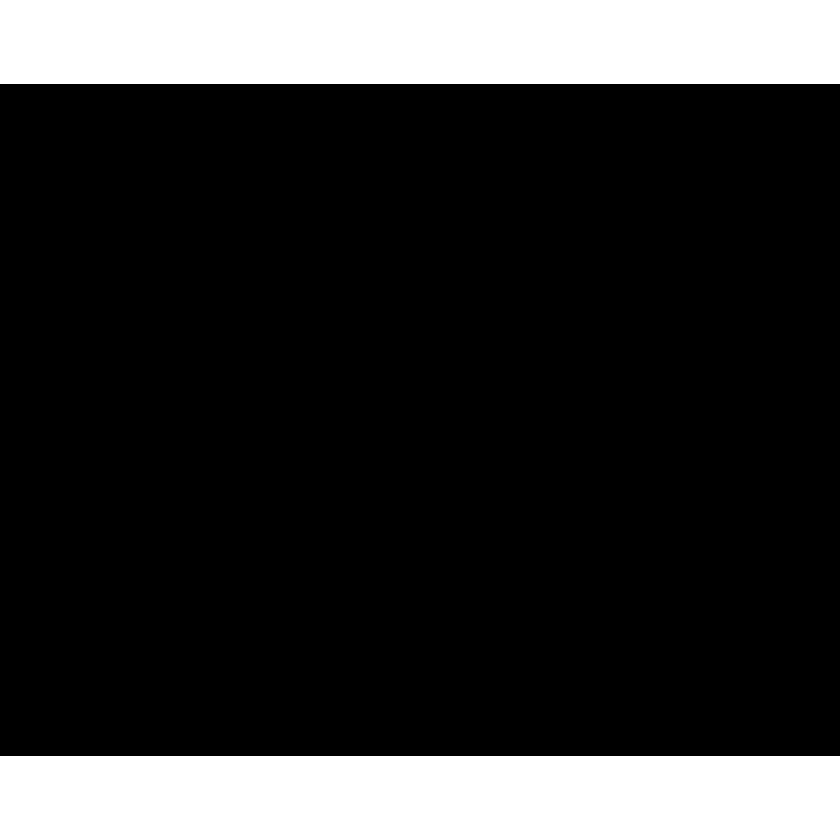

In [6]:
elmat %>%
  sphere_shade(texture = "desert") %>%
  add_water(detect_water(elmat), color="desert") %>%
  add_shadow(ray_shade(elmat,zscale=3,maxsearch = 300),0.5) %>%
  add_shadow(ambmat,0.5) %>%
  plot_3d(elmat,zscale=10,fov=0,theta=135,zoom=0.75,phi=45, windowsize = c(1000,800))
render_snapshot()

In [7]:
... awaiting 3D working to add rest of 'Getting started'...

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: ... awaiting
        ^
